In [1]:
import torch
import numpy as np
from torchvision.datasets import mnist
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader

In [2]:
def data_tf(x):
    x = np.array(x, dtype="float32") / 255
    x = (x - 0.5) / 0.5  # 标准化
    x = x.reshape((-1,))
    x = torch.from_numpy(x)
    return x

In [5]:
# train_set = mnist.MNIST("./data", train=True, download=True)
train_set = mnist.MNIST("./data", train=True, transform=data_tf, download=True)  # 定义的数据变换
test_set = mnist.MNIST("./data", train=False, transform=data_tf, download=True)
a, a_label = train_set[0]
print(a.shape, a_label)

torch.Size([784]) tensor(5)


In [6]:
# 使用 pytorch 自带的 DataLoader 定义一个数据迭代器
train_data = DataLoader(train_set, batch_size=64, shuffle=True)
test_data = DataLoader(test_set, batch_size=128, shuffle=False)
a, a_label = next(iter(train_data))
print(a.shape)
print(a_label.shape)

torch.Size([64, 784])
torch.Size([64])


In [7]:
# 使用 Sequential 定义 4 层神经网络
net = nn.Sequential(
    nn.Linear(784, 400),
    nn.ReLU(),
    nn.Linear(400, 200),
    nn.ReLU(),
    nn.Linear(200, 100),
    nn.ReLU(),
    nn.Linear(100, 10)
)
print(net)

Sequential(
  (0): Linear(in_features=784, out_features=400, bias=True)
  (1): ReLU()
  (2): Linear(in_features=400, out_features=200, bias=True)
  (3): ReLU()
  (4): Linear(in_features=200, out_features=100, bias=True)
  (5): ReLU()
  (6): Linear(in_features=100, out_features=10, bias=True)
)


In [8]:
# 定义 loss 函数
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), 1e-1)  # 使用随机梯度下降，学习率 0.1

In [9]:
# 开始训练
losses = []
acces = []
eval_losses = []
eval_acces = []

for e in range(20):
    train_loss = 0
    train_acc = 0
    net.train()
    for im, label in train_data:
        im = Variable(im)
        label = Variable(label)
        out = net(im)  # 前向传播
        loss = criterion(out, label)
        optimizer.zero_grad()  # 反向传播
        loss.backward()
        optimizer.step()
        train_loss += loss.item()  # 记录误差
        _, pred = out.max(1)  # 计算分类的准确率
        a_t = pred == label
        num_correct = (pred == label).sum().item()
        acc = num_correct / im.shape[0]
        train_acc += acc
    losses.append(train_loss / len(train_data))
    acces.append(train_acc / len(train_data))

    # 在测试集上检验效果
    eval_loss = 0
    eval_acc = 0
    net.eval()  # 将模型改为预测模式
    for im, label in test_data:
        im = Variable(im)
        label = Variable(label)
        out = net(im)
        loss = criterion(out, label)
        eval_loss += loss.item()
        _, pred = out.max(1)
        num_correct = (pred == label).sum().item()
        acc = num_correct / im.shape[0]
        eval_acc += acc

    eval_losses.append(eval_loss / len(test_data))
    eval_acces.append(eval_acc / len(test_data))
    print('epoch: {}, Train Loss: {:.6f}, Train Acc: {:.6f}, Eval Loss: {:.6f}, Eval Acc: {:.6f}'
          .format(e, train_loss / len(train_data), train_acc / len(train_data),
                  eval_loss / len(test_data), eval_acc / len(test_data)))

epoch: 0, Train Loss: 0.518944, Train Acc: 0.833622, Eval Loss: 0.176652, Eval Acc: 0.943236
epoch: 1, Train Loss: 0.169947, Train Acc: 0.947278, Eval Loss: 0.194199, Eval Acc: 0.939280
epoch: 2, Train Loss: 0.115728, Train Acc: 0.964053, Eval Loss: 0.136583, Eval Acc: 0.953817
epoch: 3, Train Loss: 0.089367, Train Acc: 0.972182, Eval Loss: 0.093440, Eval Acc: 0.970233
epoch: 4, Train Loss: 0.073064, Train Acc: 0.977595, Eval Loss: 0.076913, Eval Acc: 0.974288
epoch: 5, Train Loss: 0.061584, Train Acc: 0.980844, Eval Loss: 0.096625, Eval Acc: 0.968453
epoch: 6, Train Loss: 0.053268, Train Acc: 0.983209, Eval Loss: 0.097904, Eval Acc: 0.970728
epoch: 7, Train Loss: 0.043663, Train Acc: 0.985941, Eval Loss: 0.076058, Eval Acc: 0.975969
epoch: 8, Train Loss: 0.038902, Train Acc: 0.987340, Eval Loss: 0.364998, Eval Acc: 0.901009
epoch: 9, Train Loss: 0.033776, Train Acc: 0.988923, Eval Loss: 0.078837, Eval Acc: 0.976365
epoch: 10, Train Loss: 0.029461, Train Acc: 0.989972, Eval Loss: 0.070

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

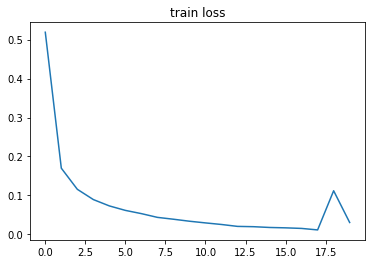

In [11]:
plt.title('train loss')
plt.plot(np.arange(len(losses)), losses)
plt.show()

In [16]:
import time
print(time.strftime("%b %d %Y %H:%M:%S", time.gmtime(time.time())))

Oct 24 2018 10:03:16
